In [15]:
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

In [16]:
dataset_names = ['LiGen', 'Query26', 'Stereomatch']

In [17]:
files = list(glob('./../results/maliboo_runs/*.json')) + list(glob('./../results/prova_KG/*.json'))
sorted(files)

['./../results/maliboo_runs/2023-08-09_1022_LiGen_mq0.json',
 './../results/maliboo_runs/2023-08-09_1022_LiGen_mq5.json',
 './../results/maliboo_runs/2023-08-09_1022_Query26_mq0.json',
 './../results/maliboo_runs/2023-08-09_1022_Query26_mq5.json',
 './../results/maliboo_runs/2023-08-09_1022_Stereomatch_mq0.json',
 './../results/maliboo_runs/2023-08-09_1022_Stereomatch_mq5.json',
 './../results/prova_KG/Hartmann3_2023-10-12_1837.json',
 './../results/prova_KG/LiGen_2023-10-12_1800.json',
 './../results/prova_KG/LiGen_2023-10-12_1804.json',
 './../results/prova_KG/LiGen_2023-10-12_1805.json',
 './../results/prova_KG/LiGen_2023-10-12_1816.json',
 './../results/prova_KG/LiGen_2023-10-12_1823.json',
 './../results/prova_KG/LiGen_2023-10-12_1833.json',
 './../results/prova_KG/LiGen_2023-10-12_1834.json',
 './../results/prova_KG/LiGen_2023-10-12_1838.json',
 './../results/prova_KG/LiGen_2023-10-12_1840.json',
 './../results/prova_KG/LiGen_2023-10-26_1029.json',
 './../results/prova_KG/LiGen_2

In [18]:
dfs = {}
for filename in files:
    df = pd.read_json(filename, orient='records')
    # df = df.set_index('iteration')
    if 'prova_KG' in filename:
        df['algorithm'] = 'q-KG'
    else:
        df['algorithm'] = 'MALIBOO'
    df['filename'] = filename.rsplit('/', 1)[-1].replace('.json', '')
    for dataset_name in dataset_names:
        if dataset_name.upper() in filename.upper():
            dfs.setdefault(dataset_name.lower(), []).append(df)
            break

In [19]:
def select_data(dfs, selected_dataset):
    selected_dfs = {}
    for df in dfs[selected_dataset.lower()]:
        if len(df) == 1:
            # print(df.iloc[0])
            continue
        min_cost = df['computed_cost'].min()
        best_row = df.sort_values(['computed_cost', 'n_evaluations']).iloc[0]
        # print(best_row)
        algo = best_row['algorithm']
        if algo == 'q-KG':
            q = best_row['q']
            key = f'{algo}'.replace('q', str(q))
        else:
            mq = best_row['filename'][-1]
            key = f'EI mq{mq}'
        data_dict = {'data': df, 'computed_cost': best_row['computed_cost'], 'n_evaluations': best_row['n_evaluations']}
        selected_dfs.setdefault(key, data_dict)
        if (selected_dfs[key]['computed_cost'] > best_row['computed_cost'] 
            or (selected_dfs[key]['computed_cost'] == best_row['computed_cost'] and selected_dfs[key]['n_evaluations'] >= best_row['n_evaluations'])):
            print('Better!', key)
            print(min_cost)
            selected_dfs[key] = data_dict
    return selected_dfs

In [20]:
def plot(selected_dfs, selected_dataset):
    plt.figure(figsize=(12, 5))
    for key, data_dict in selected_dfs.items():
        df = data_dict['data']
        if len(df) == 1:
            print(df.iloc[0])

        plt.plot(df['n_evaluations'], df['computed_cost'], 
                 label=key, 
                 marker='+', 
                 linestyle=':'
                )
    plt.legend()
    plt.xlabel('# evaluations')
    plt.ylabel('cost')
    plt.title(f'{selected_dataset}: Cost Comparison')

Better! EI mq5
667.544416
Better! EI mq0
667.544416
Better! 3-KG
826.223434
Better! 5-KG
781.14224583
Better! 1-KG
1830.566820672
Better! 1-KG
788.659748125
Better! 7-KG
728.04426048
Better! 8-KG
826.223434
Better! 8-KG
826.223434
Better! 3-KG
826.223434


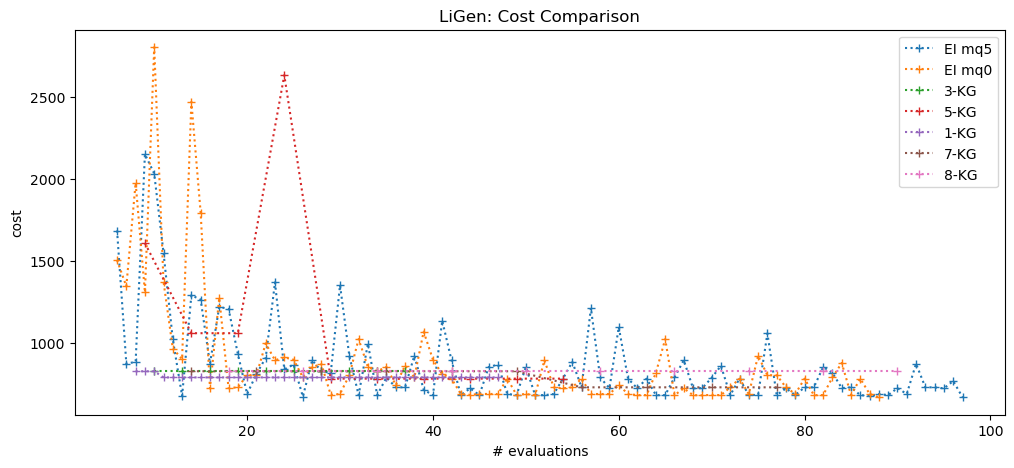

In [21]:
selected_dfs = select_data(dfs, 'LiGen')
plot(selected_dfs, 'LiGen')

Better! EI mq5
2071770
Better! EI mq0
691836
Better! 3-KG
683682
Better! 4-KG
683682
Better! 1-KG
691836
Better! 5-KG
683682
Better! 2-KG
1300415
Better! 7-KG
691836
Better! 1-KG
683682
Better! 7-KG
683682
Better! 4-KG
683682


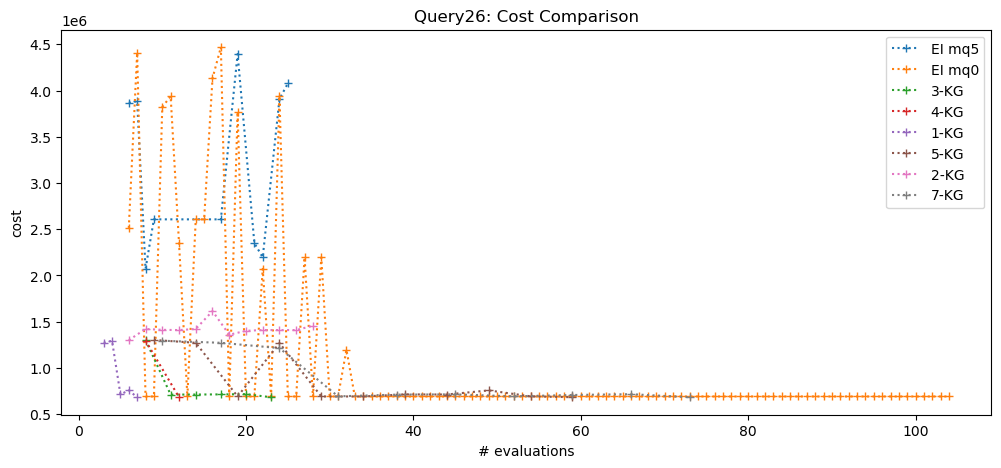

In [25]:
selected_dfs = select_data(dfs, 'Query26')
plot(selected_dfs, 'Query26')

Better! EI mq5
36791
Better! EI mq0
36791
Better! 1-KG
47466
Better! 3-KG
36900
Better! 4-KG
37887
Better! 4-KG
37887
Better! 4-KG
36900


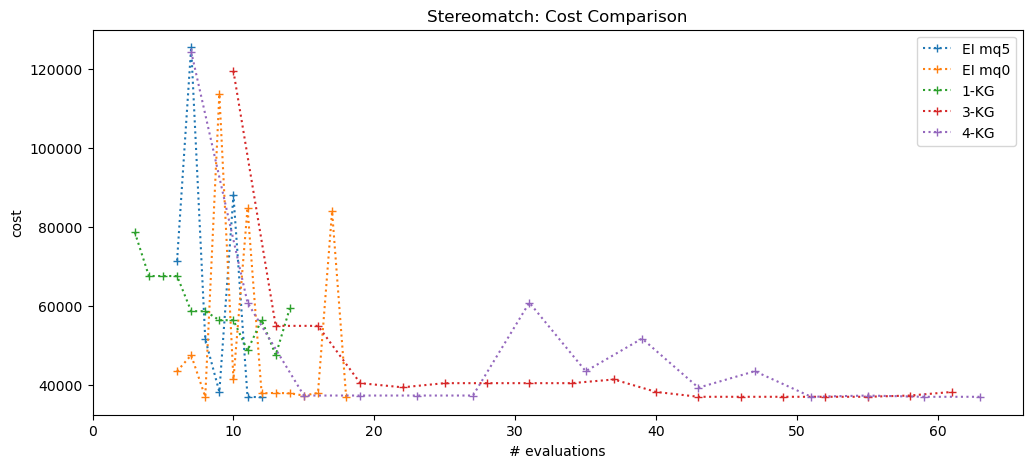

In [26]:
selected_dfs = select_data(dfs, 'Stereomatch')
plot(selected_dfs, 'Stereomatch')